In [11]:
LFPexample=readdlm("GarbageCollector/LFPSuave-732.dat");

In [12]:
include("DiferentialOperators01.jl")

Divergencia2D (generic function with 2 methods)

In [13]:
(EFx,EFy)=Gradiente2D(-LFPexample);

In [14]:
EF2x=float64(EFx)

64x64 Array{Float64,2}:
  1.69138      9.92994     7.45463   …   -6.65988   -17.4774   -9.71951 
  2.44572      5.24885    -1.28143       -7.16144   -13.7508   -6.96586 
  5.16877      4.12543    -8.44452       -0.416635   -9.40104  -7.28723 
  8.30731      7.21495    -7.62006        8.93602     4.76132  -0.547562
  8.2325       9.70362    -0.245714       4.0525     11.8021    6.14594 
  5.15219      4.96185    -0.944307  …   -5.21392     1.42527   2.10147 
  1.21752     -2.96564    -4.77774      -10.0654    -10.2608   -3.0567  
  1.9117      -2.33035    -3.34863      -14.3791     -7.32012   1.73812 
  3.32076      0.973308   -1.21705      -10.4481     -6.61492   0.740017
  3.8327       0.738006   -6.94464       -5.47866    -8.89296  -3.70532 
  0.0101498   -7.39012   -14.9783    …   -6.94673    -7.38616  -3.96256 
  1.07321     -6.27045   -14.1359        -6.39745    -4.56021  -3.41384 
  1.67399     -3.13309    -7.1764        -4.47437    -1.78743  -0.82304 
  ⋮                        

In [15]:
Rho=Divergencia2D(EFx, EFy);

In [16]:
using PyPlot

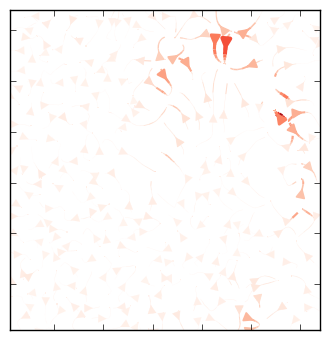

In [18]:
ion()
figure(figsize=(4,4))
tick_params(labelbottom="off", labelleft="off")
x=collect(1:64)
y=collect(1:64)
Amplitud=sqrt(EFx.*EFx+EFy.*EFy)
(chico,grande)=extrema(Amplitud)
AmplitudNormalizada=Amplitud/grande

xlim(1,64)
ylim(1,64)
#clim(0,120)
flechitas=streamplot(x,y,EFx,EFy, color=AmplitudNormalizada,cmap="Reds", 
density=1, linewidth=5*AmplitudNormalizada, arrowsize=2);
savefig("GarbageCollector/VectoresRojos_732.png", dpi=90)

#cb=colorbar(flechitas)

In [11]:
blabla=readdir("GarbageCollector/LFP/");

In [16]:
blabla[1302]

"LFPSuave-250.dat"

In [17]:
PyPlot.ioff()

@time for h in blabla[1302:end]
    figure(figsize=(6,6))
    xlim(0,64)
    ylim(1,64)
    Testing=readdlm("GarbageCollector/LFP/$h");
    (EFx,EFy)=Gradiente2D(-Testing)
    flechitas=quiver(x,y,EFx,EFy, sqrt((EFx.*EFx+EFy.*EFy)), 
    pivot="middle", cmap="Dark2",
    width=0.006)
    #cb=colorbar(flechitas, clim(0,120))
    tick_params(          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
    bottom="off",# ticks along the bottom edge are off
    top="off",         # ticks along the top edge are off
    right="off",
    left="off",
    labelbottom="off",
    labelleft="off")
    savefig("GarbageCollector/LFP/VectoresPacheco_$h.png", dpi=72)
    clf()
    
end
PyPlot.close_queued_figs()

elapsed time: 185.372838403 seconds (642417972 bytes allocated, 0.56% gc time)


In [52]:
PyPlot.close("all")

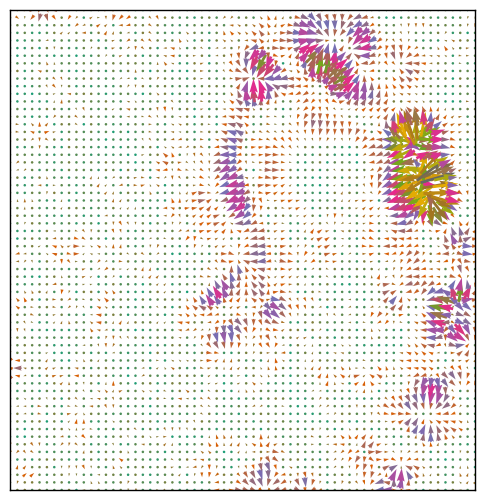

In [47]:
x=1:64
y=1:64
PyPlot.ion()
figure(figsize=(6,6), frameon=false)

xlim(1,64)
ylim(1,64)
#clim(0,120)
flechitas=quiver(x,y,EFx,EFy, sqrt((EFx.*EFx+EFy.*EFy)), 
pivot="middle", cmap="Dark2", width=0.006);
tick_params(          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
    bottom="off",# ticks along the bottom edge are off
    top="off",         # ticks along the top edge are off
right="off",
left="off",
    labelbottom="off",
labelleft="off")

In [18]:
x=collect(1:64)
y=collect(1:64)
PyPlot.ioff()
@time for h in blabla[1302:end]
    Testing=readdlm("GarbageCollector/LFP/$h");
    (EFx,EFy)=Gradiente2D(-Testing)    
    Amplitud=sqrt(EFx.*EFx+EFy.*EFy)
    figure(figsize=(6,6))
    xlim(1,64)
    ylim(1,64)
    flechitas=streamplot(x,y,EFx,EFy, color=AmplitudNormalizada,cmap="Reds", 
    density=2, linewidth=0.05*Amplitud, arrowsize=3, arrowstyle="Fancy");
    savefig("GarbageCollector/LFP/LineasEF_$h.png", dpi=72)
    clf()
end

elapsed time: 5684.464439916 seconds (661894260 bytes allocated, 0.13% gc time)


In [19]:
PyPlot.close("all")